<a href="https://colab.research.google.com/github/djmary-k/Py17DS_HW06/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6

Дано два файли (data_2d.csv, mnist.csv) - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Завантажуємо перший датасет з файлу data_2d.csv
df_2d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_2d.csv')

df_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [4]:
# Завантажуємо другий датасет з файлу mnist.csv
df_mnist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist.csv')

df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Почнемо роботу спочатку з датасетом df_2d. Як ми бачимо з виводу даного датасету, в нас є 3 стовпці, перший з яких, не несе ніякої корисної інформації, так як в ньому в  усі рядки поміщєні 0. Прибираємо даний стовпець.

In [5]:
df_2d_cleaned = df_2d.iloc[:, 1:]

df_2d_cleaned.head()

,-7.687164597386728637e-01,4.608603078297135447e-01
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400
3,-0.082282,1.137218
4,2.083069,2.694482


In [6]:
# Застосуємо elbow method для знаходження оптимальної кількості кластерів
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df_2d_cleaned)
    inertias.append(kmeans.inertia_)

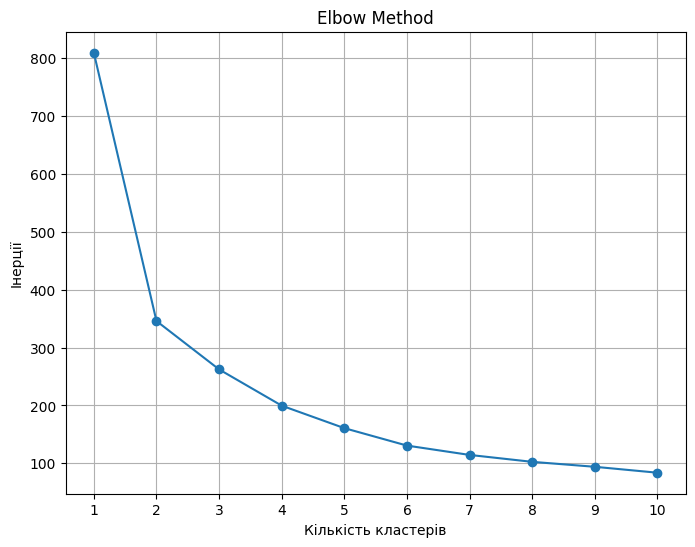

In [7]:
# Візуалізацію elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерції')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

На графіку методу ліктя видно, що збільшення кількості кластерів веде до зменшення відстані від точок до центру їхнього кластера.
Логічно припускати, що кількість кластерів буде від 2 до 4. Проведемо дослідження.

In [8]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

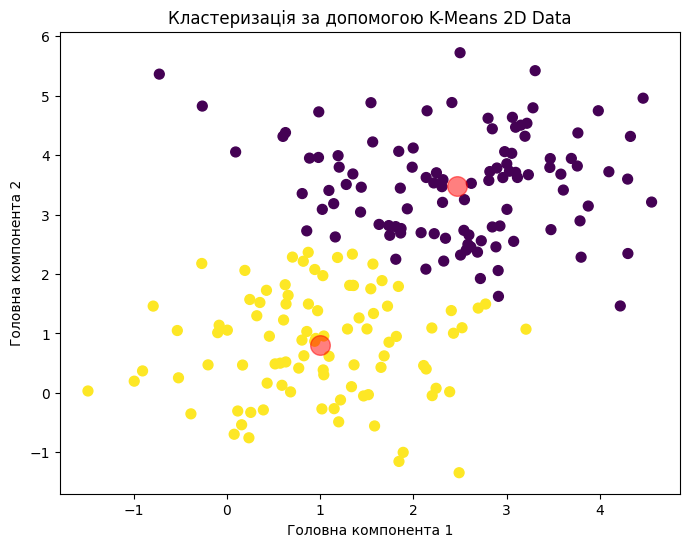

In [9]:
# Візуалізуємо кластеризовані точки
plt.figure(figsize=(8, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Кластеризація за допомогою K-Means 2D Data')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

Як бачимо, що 2 кластери замало, тому давайте зробимо те саме, але вже з 4 кластерами.

In [10]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

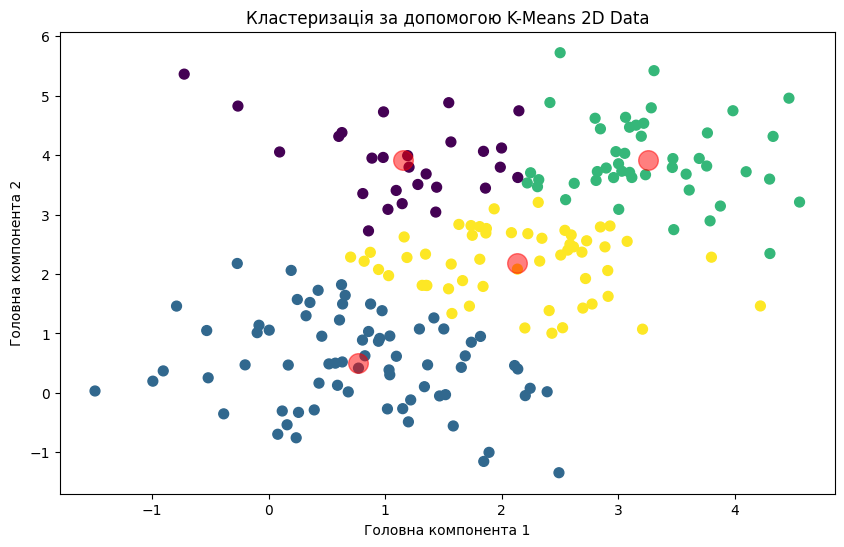

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Кластеризація за допомогою K-Means 2D Data')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

Як бачимо, розподілення набагато краще. Тому, мабуть, 4 кластери, це найоптимальніший варіант, який показує чітке розділення даних на групи та координати центроїдів.

Також спробуємо реалізувати кластеризацію за допомогою "продвинутого" та більш сучасного методу kmeans++

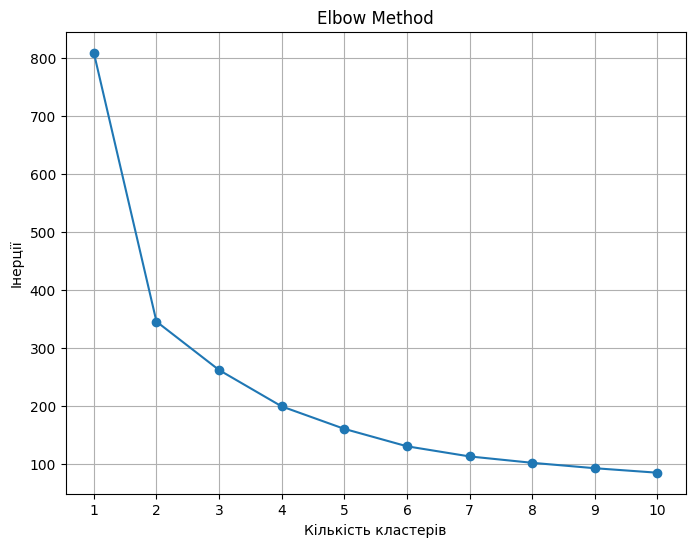

In [12]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_2d_cleaned)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерції')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

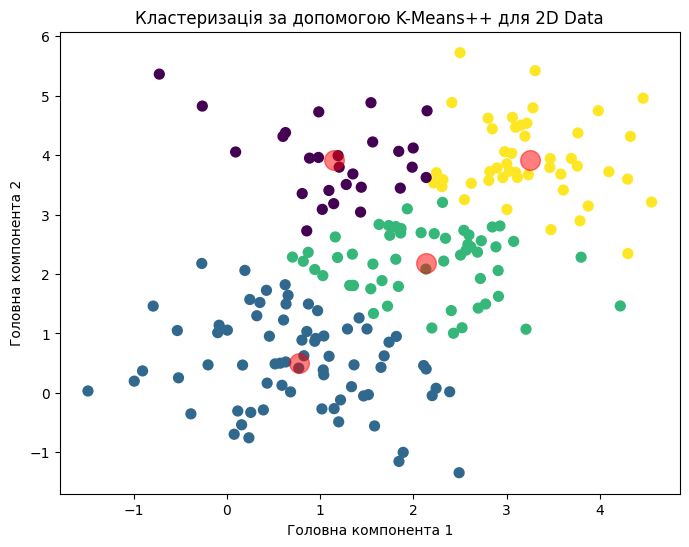

In [13]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

plt.figure(figsize=(8, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Кластеризація за допомогою K-Means++ для 2D Data')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

Як ми бачимо з графіків, вцілому обидва методи кластеризують по групах і видають очікуваний результат. Єдине можна побачити, що за допомогою kmeans++ трохи центральніше знаходяться координати центроїдів, що більш точно, як ми бачимо візуально.

In [14]:
# Перейдем до роботи з датасетом mnist.csv. Зчитаємо перші 5 рядків датасету
df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Як бачимо, в нас дуже дуже великий пласт даних, і нам потрібно скористатись алгоритмом PCA щоб зменшити розмірність наших даних до 2-вимірного варіанту.

Але спочатку розділимо нашу вибірку на Х дані (тобто features) та y - тобто мітки класів.

In [15]:
X = df_mnist.drop(columns=df_mnist.columns[0])
y = df_mnist[df_mnist.columns[0]]

In [16]:
# Застосуємо алгоритм PCA для зменшення розмірності даних до 2-вимірного варіанту
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca

array([[-7.58472321e+01, -1.04350347e+03],
       [-9.69405257e+02, -3.44764931e+02],
       [ 1.05412774e+03, -3.58661033e+02],
       [ 4.20941083e+02,  6.71109835e+02],
       [-1.00282690e+03, -3.02500739e+02],
       [-6.07914395e+01,  4.23333947e+02],
       [-1.72312034e+02,  4.36580075e+02],
       [ 1.82387842e+02,  1.75962012e+02],
       [ 9.31494471e+01,  5.52550910e+02],
       [ 9.50226891e+02, -1.01117210e+03],
       [ 3.58493556e+02, -3.30243172e+02],
       [ 6.12842869e+00,  9.38122912e+02],
       [ 1.08067541e+03, -3.57627367e+02],
       [-1.11595858e+03, -4.11885254e+02],
       [ 1.52753512e+02, -6.37697410e+02],
       [ 4.03682533e+02,  9.30051009e+02],
       [ 4.70229403e+00,  3.84928803e+02],
       [ 1.39587933e+02, -4.57347202e+02],
       [ 5.72653837e+01,  7.67841122e+02],
       [-2.63456773e+02,  3.41657231e+02],
       [ 3.12844430e+02, -1.17424487e+02],
       [-2.16176671e+01,  1.67702053e+02],
       [-8.29235870e+01, -9.91035885e+01],
       [-1.

Використовуючи метод kmeans кластеризуємо отриманий датасет.

Для цього спочатку використаємо elbow method щоб розуміти, яка оптимальна кількість кластерів нам потрібна.

In [17]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

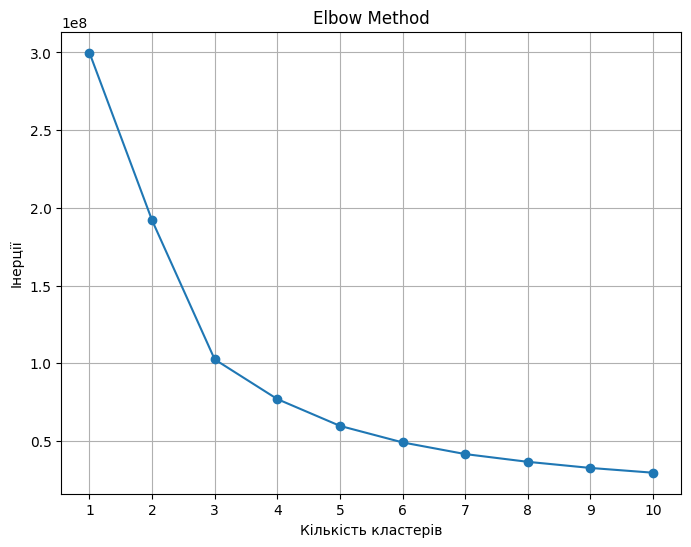

In [18]:
# Візуалізація отриманих інерцій
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерції')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Як бачимо з даного графіку, оптимальною буде кількість кластерів між 3 або 5. Робимо перевірку.

In [19]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

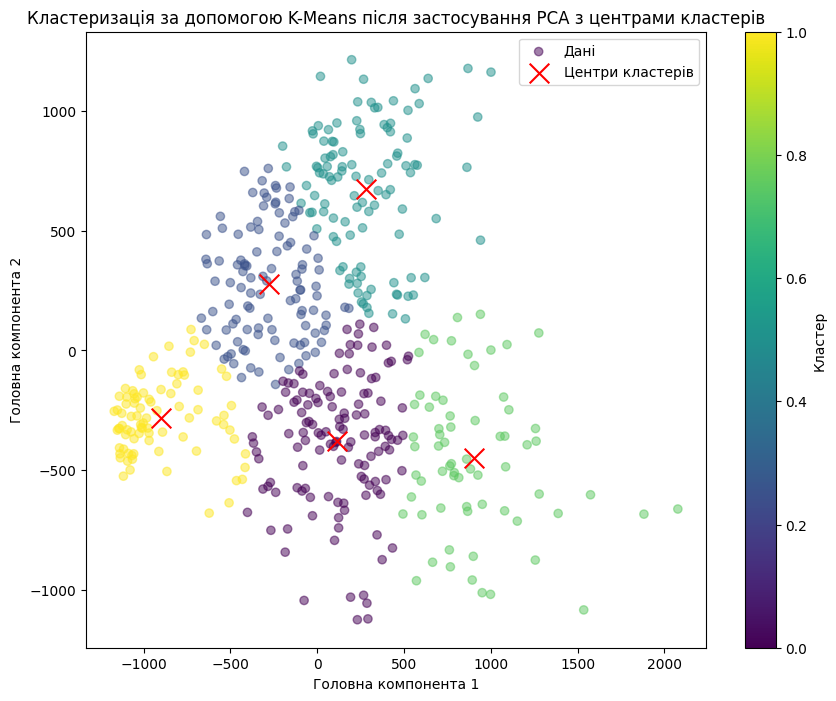

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5, label='Дані')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Центри кластерів')
plt.title('Кластеризація за допомогою K-Means після застосування PCA з центрами кластерів')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.colorbar(label='Кластер')
plt.legend()
plt.show()

На основі графіка методу ліктя здається, що інерція швидко знижується при збільшенні кількості кластерів від 1 до 3 або 4, і після цього зменшення стає менш різким. Це може вказувати на те, що оптимальна кількість кластерів лежить десь між 3 і 4, оскільки додавання додаткових кластерів не дає значного поліпшення у варіативності даних, що може бути охоплено кластерами.

При візуалізації результатів методу kmeans з різними даними, можна зробити висновок, що візуально 5 кластерів це найоптимальний варіант, який розбиває на оптимальну кількість кластерів з відповідними координатами центроїдів.